# Mô hình phân cụm K-mean

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Đọc dữ liệu từ file CSV
data = pd.read_csv(r'D:\Đại học\Khoa học dữ liệu\08-Phân Cụm LapTop\model\data.csv')
data = data.drop(columns='Title')
# Hiển thị kích thước và thông tin của dữ liệu
print(data.shape)
data.info()
data.head()


(732, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price sale        732 non-null    float64
 1   CPU               732 non-null    float64
 2   Ram               732 non-null    float64
 3   Storage           732 non-null    float64
 4   Operating system  732 non-null    float64
 5   Brand             732 non-null    float64
 6   Screen size       732 non-null    float64
 7   discount          732 non-null    float64
dtypes: float64(8)
memory usage: 45.9 KB


,Price sale,CPU,Ram,Storage,Operating system,Brand,Screen size,discount
0,0.069532,0.7,0.011765,0.098592,1.0,0.125,0.557522,0.114894
1,0.111426,0.1,0.011765,0.098592,1.0,0.750,0.628319,0.127660
2,0.077640,0.7,0.011765,0.098592,1.0,0.500,0.557522,0.072340
3,0.070883,0.8,0.011765,0.098592,1.0,0.000,0.628319,0.106383
4,0.118184,0.8,0.011765,0.098592,1.0,0.500,0.526549,0.106383



## Tách dữ liệu thành tập huấn luyện và tập kiểm tra (80% - 20%)

In [18]:

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

train_data.to_csv('D:/Đại học/Khoa học dữ liệu/08-Phân Cụm LapTop/model/Kmean/train_data.csv', index=False)
test_data.to_csv('D:/Đại học/Khoa học dữ liệu/08-Phân Cụm LapTop/model/Kmean/test_data.csv', index=False)

In [19]:

data_train = pd.read_csv('D:/Đại học/Khoa học dữ liệu/08-Phân Cụm LapTop/model/Kmean/train_data.csv')
print(data_train.shape)

data_test = pd.read_csv('D:/Đại học/Khoa học dữ liệu/08-Phân Cụm LapTop/model/Kmean/test_data.csv')
print(data_test.shape)

(585, 8)
(147, 8)


chọn đặc trưng

In [20]:
columns_to_scale = ['Price sale', 'CPU', 'Ram', 'Storage', 'Screen size', 'Operating system', 'Brand','discount']

chọ K là số cụm bằng Elbow

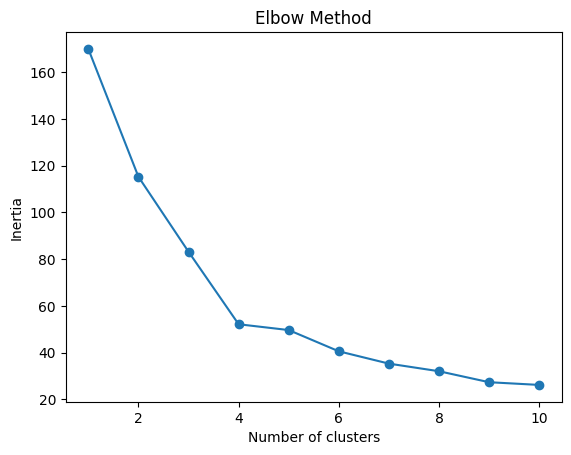

In [21]:

# Tính Inertia cho số lượng cụm từ 1 đến 10
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_train[columns_to_scale])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


huấn luyện mô hình

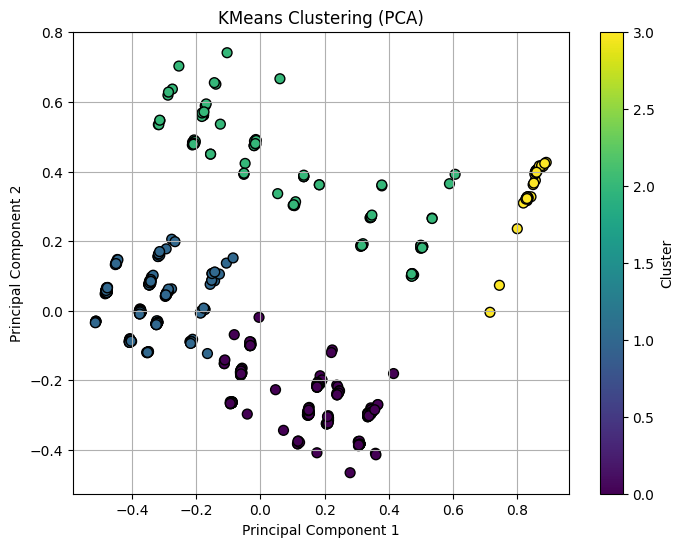

In [22]:

from sklearn.decomposition import PCA

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_train)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_train)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering (PCA)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

C:\Users\OS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


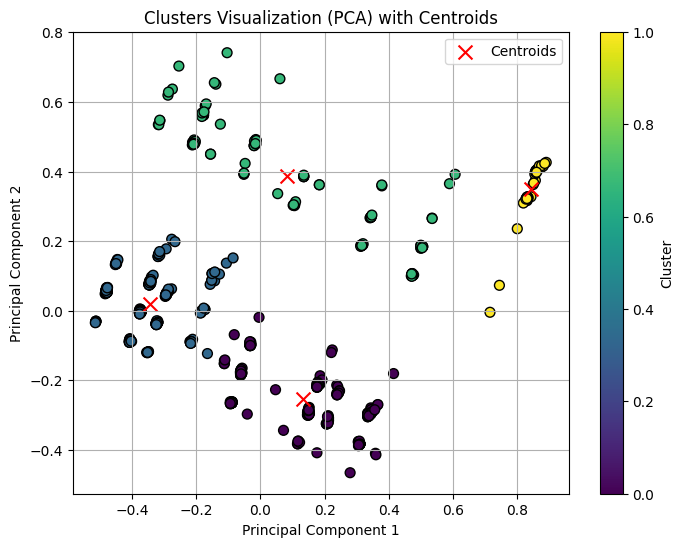

In [23]:
# Lấy ra tọa độ của các centroid
centroids = kmeans.cluster_centers_

# Sử dụng PCA để giảm chiều dữ liệu của centroids
centroids_pca = pca.transform(centroids)

# Vẽ biểu đồ phân cụm trên không gian PCA cùng với các centroid
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', color='red', s=100, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization (PCA) with Centroids')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()


Phân lọai dữ liệu

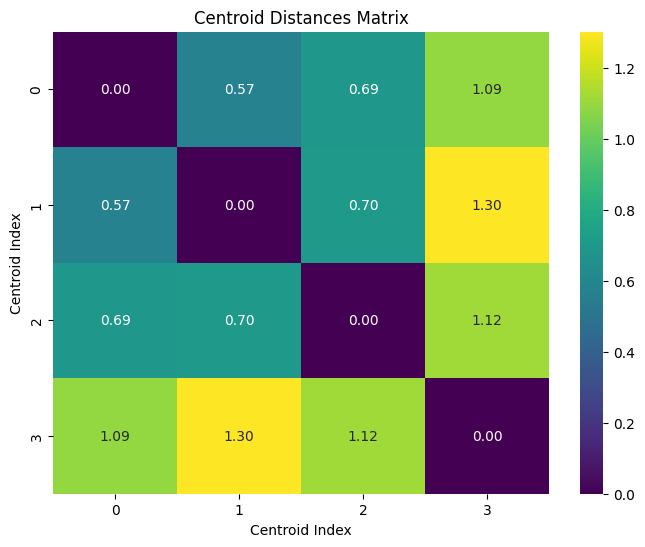

In [24]:
from scipy.spatial.distance import pdist, squareform
centroid_distances = pdist(centroids)

centroid_distances_matrix = squareform(centroid_distances)
plt.figure(figsize=(8, 6))
sns.heatmap(centroid_distances_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Centroid Distances Matrix')
plt.xlabel('Centroid Index')
plt.ylabel('Centroid Index')
plt.show()

IndexError: list index out of range

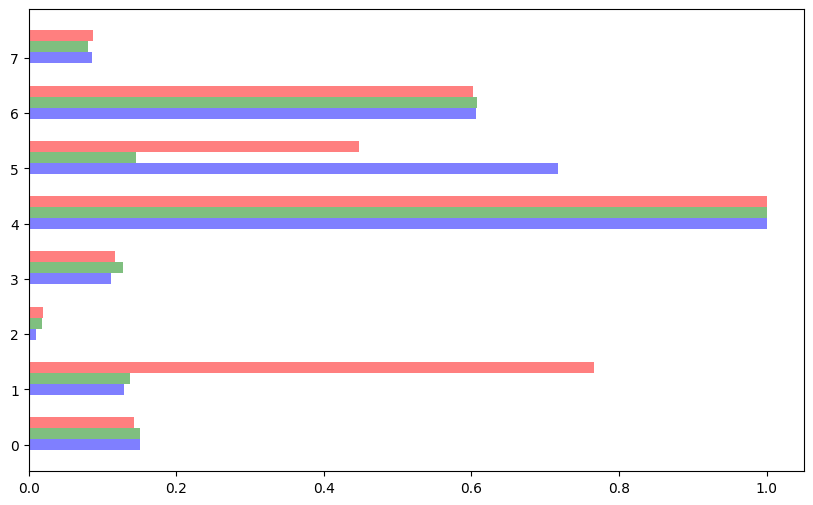

In [25]:
# Tạo DataFrame từ các centroids và đặt tên cột
centroids_df = pd.DataFrame(centroids, columns=data.columns)

# Lấy danh sách các đặc trưng
features = centroids_df.columns

# Màu cho từng cụm
colors = ['blue', 'green', 'red']

plt.figure(figsize=(10, 6))
bar_width = 0.2  # Độ rộng của mỗi cột

for i in range(len(centroids)):
    bar_position = np.arange(len(features)) + i * bar_width  # Vị trí của mỗi cụm trên trục y
    plt.barh(bar_position, centroids[i], height=bar_width, color=colors[i], alpha=0.5, label=f'Segment {i+1}')

plt.yticks(np.arange(len(features)) + 0.5 * bar_width, features)  # Đặt nhãn cho trục y
plt.xlabel('Values')
plt.ylabel('Features')
plt.title('Centroids Features')
plt.legend()
plt.grid(axis='x')
plt.show()


In [ ]:

centroid_names = []
for i in range(len(centroids)):
    centroid_info = centroids_df.iloc[i].sort_values(ascending=False)
    centroid_name = f"Segment {i+1}: "
    top_features = []
    for feature, value in centroid_info.items():
        if value > 0.5:  
               top_features.append(f"{feature}")
    centroid_name += ", ".join(top_features)
    centroid_names.append(centroid_name)

for i, centroid_name in enumerate(centroid_names):
    cluster_size = np.sum(clusters == i)
    print(f"Tên của centroid {i+1}: {centroid_name}, Số lượng: {cluster_size}")


Tên của centroid 1: Segment 1: Brand, Screen size, Số lượng: 43
Tên của centroid 2: Segment 2: Operating system, Screen size, Số lượng: 411
Tên của centroid 3: Segment 3: Operating system, Brand, Screen size, Số lượng: 236


đánh giá mô hình

In [ ]:
from sklearn.metrics import silhouette_score

# Dự đoán nhãn của dữ liệu huấn luyện
train_predictions = kmeans.predict(data_train)
test_predictions = kmeans.predict(data_test)


# Tính Silhouette Score
silhouette_score_train = silhouette_score(data_train, train_predictions)
silhouette_score_test = silhouette_score(data_test, test_predictions)

print("Silhouette Score trên dữ liệu huấn luyện:", silhouette_score_train)
print("Silhouette Score trên dữ liệu test", silhouette_score_test)

print("Độ chính xác", silhouette_score_train/silhouette_score_test *100 )




Silhouette Score trên dữ liệu huấn luyện: 0.4416051352990397
Silhouette Score trên dữ liệu test 0.4477194267811117
Độ chính xác 98.63434751401546


In [ ]:
# Tính phần trăm tăng/giảm của Calinski-Harabasz Index
calinski_percentage = ((train_calinski_harabasz ) / abs(test_calinski_harabasz)) * 100

# Tính phần trăm tăng/giảm của Silhouette Score
silhouette_percentage = ((train_silhouette_score ) / abs(test_silhouette_score)) * 100

# In ra kết quả
print("Phần trăm tăng/giảm của Calinski-Harabasz Index: {:.2f}%".format(calinski_percentage))
print("Phần trăm tăng/giảm của Silhouette Score: {:.2f}%".format(silhouette_percentage))


Phần trăm tăng/giảm của Calinski-Harabasz Index: 491.01%
Phần trăm tăng/giảm của Silhouette Score: 96.69%


Calinski-Harabasz Index:
Tập huấn luyện: 582.6091818190203
Tập kiểm tra: 122.5317138757144

Silhouette Score:
Tập huấn luyện: 0.4416051352990397
Tập kiểm tra: 0.4477194267811117


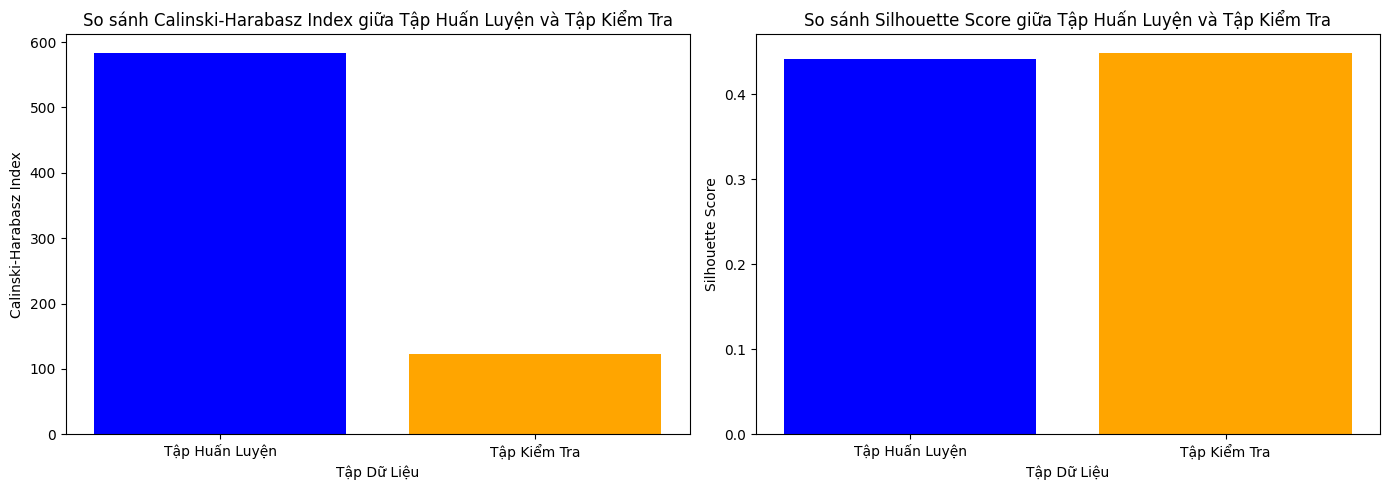

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Huấn luyện mô hình phân cụm trên tập huấn luyện
kmeans = KMeans(n_clusters=5, random_state=42)
train_clusters = kmeans.fit_predict(data_train)

# Dự đoán nhãn cho tập kiểm tra
test_clusters = kmeans.predict(data_test)

# Tính Calinski-Harabasz Index cho tập huấn luyện và tập kiểm tra
train_calinski_score = calinski_harabasz_score(data_train, train_clusters)
test_calinski_score = calinski_harabasz_score(data_test, test_clusters)

# Tính Silhouette Score cho tập huấn luyện và tập kiểm tra
train_silhouette_score = silhouette_score(data_train, train_clusters)
test_silhouette_score = silhouette_score(data_test, test_clusters)

# Hiển thị kết quả
print("Calinski-Harabasz Index:")
print("Tập huấn luyện:", train_calinski_score)
print("Tập kiểm tra:", test_calinski_score)
print("\nSilhouette Score:")
print("Tập huấn luyện:", train_silhouette_score)
print("Tập kiểm tra:", test_silhouette_score)

# Vẽ biểu đồ so sánh
labels = ['Tập Huấn Luyện', 'Tập Kiểm Tra']
calinski_scores = [train_calinski_score, test_calinski_score]
silhouette_scores = [train_silhouette_score, test_silhouette_score]

x = range(len(labels))

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.bar(x, calinski_scores, color=['blue', 'orange'])
plt.xlabel('Tập Dữ Liệu')
plt.ylabel('Calinski-Harabasz Index')
plt.title('So sánh Calinski-Harabasz Index giữa Tập Huấn Luyện và Tập Kiểm Tra')
plt.xticks(x, labels)

plt.subplot(1, 2, 2)
plt.bar(x, silhouette_scores, color=['blue', 'orange'])
plt.xlabel('Tập Dữ Liệu')
plt.ylabel('Silhouette Score')
plt.title('So sánh Silhouette Score giữa Tập Huấn Luyện và Tập Kiểm Tra')
plt.xticks(x, labels)

plt.tight_layout()
plt.show()
